<a href="https://www.kaggle.com/code/salmaashraf12/ford-go-bike-data-analysis?scriptVersionId=165376930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-gobike-2019feb-tripdata/201902-fordgobike-tripdata.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/ford-gobike-2019feb-tripdata/201902-fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df['start_time']=pd.to_datetime(df['start_time'])
year=df['start_time'].dt.year

In [5]:
df['member_birth_year'].dropna(inplace=True)
df['age']=year-df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type            

In [9]:
df['end_time']=pd.to_datetime(df['end_time'])
df['total_time']=df['end_time']-df['start_time']

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             174952 non-null  int64          
 1   start_time               174952 non-null  datetime64[ns] 
 2   end_time                 174952 non-null  datetime64[ns] 
 3   start_station_id         174952 non-null  float64        
 4   start_station_name       174952 non-null  object         
 5   start_station_latitude   174952 non-null  float64        
 6   start_station_longitude  174952 non-null  float64        
 7   end_station_id           174952 non-null  float64        
 8   end_station_name         174952 non-null  object         
 9   end_station_latitude     174952 non-null  float64        
 10  end_station_longitude    174952 non-null  float64        
 11  bike_id                  174952 non-null  int64          
 12  user_ty

In [11]:
df['duration_hr']=df['duration_sec']/3600
df['duration_hr']

0         14.495833
2         17.181667
3         10.136111
4          0.440278
5          0.498056
            ...    
183407     0.133333
183408     0.086944
183409     0.039167
183410     0.038611
183411     0.075278
Name: duration_hr, Length: 174952, dtype: float64

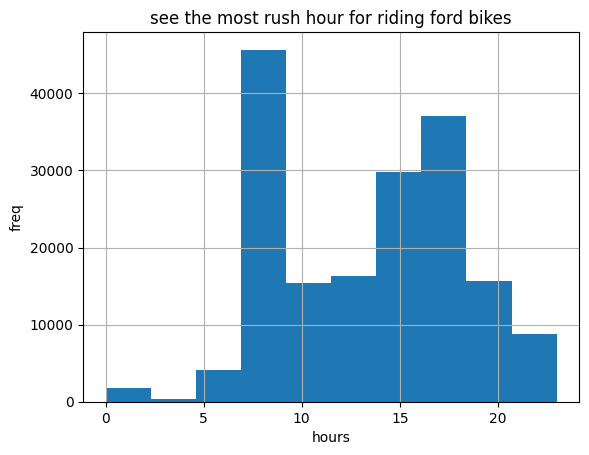

In [12]:
df['start_time'].dt.hour.hist()
plt.xlabel("hours")
plt.ylabel("freq")
plt.title("see the most rush hour for riding ford bikes");

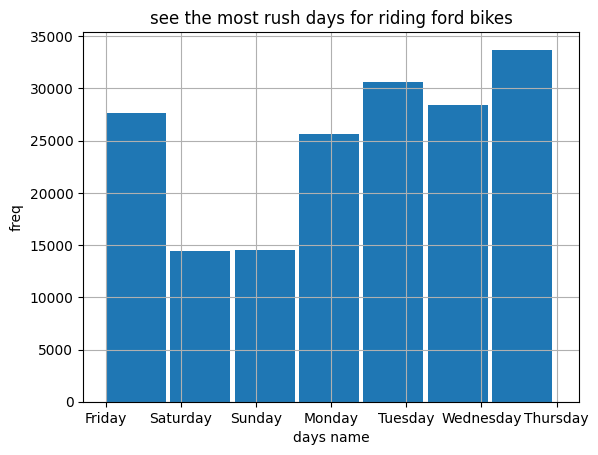

In [13]:
df['start_time'].sort_values().dt.day_name().hist(bins=7,width=0.8)
plt.xlabel("days name")
plt.ylabel("freq")
plt.title("see the most rush days for riding ford bikes");

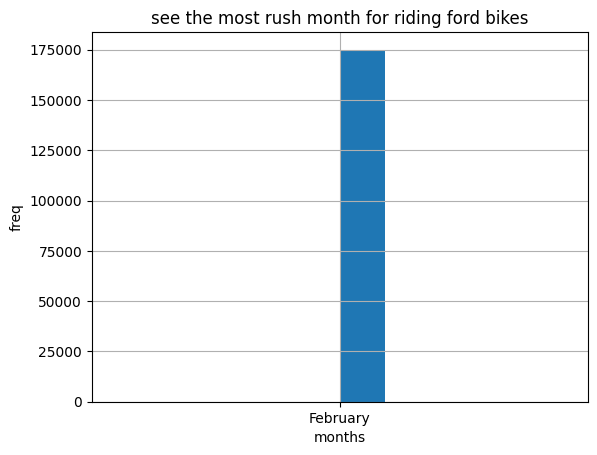

In [14]:
df['start_time'].dt.month_name().hist()
plt.xlabel("months")
plt.ylabel("freq")
plt.title("see the most rush month for riding ford bikes");

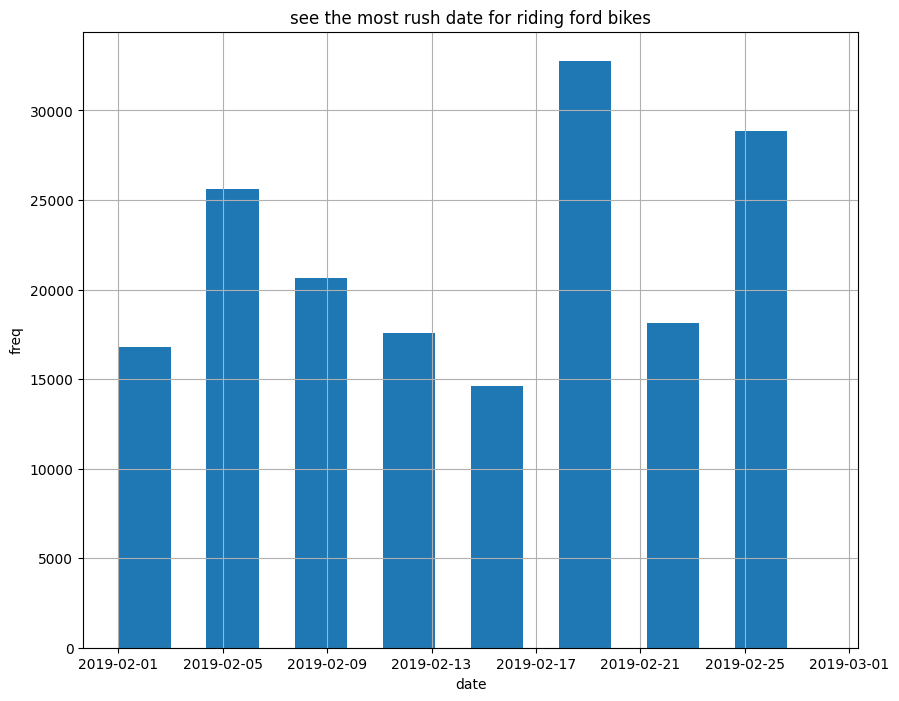

In [15]:
plt.figure(figsize=[10,8])
df['start_time'].dt.date.hist(bins=8,width=2)
plt.xlabel("date")
plt.ylabel("freq")
plt.title("see the most rush date for riding ford bikes");

In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,total_time,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,0 days 14:29:45.830000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,0 days 17:10:54.928000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,0 days 10:08:10.832000,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,0 days 00:26:25.525000,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,0 days 00:29:53.128000,0.498056


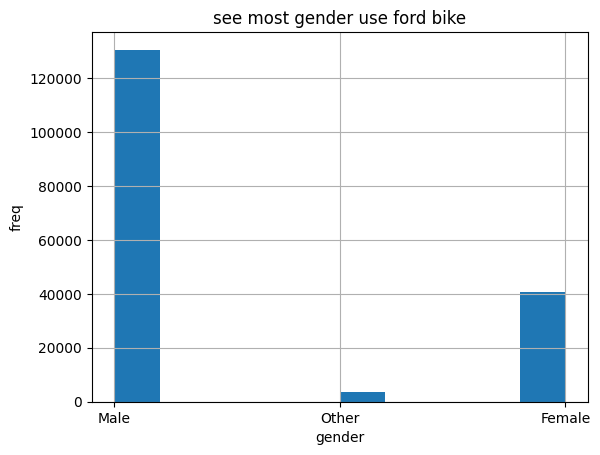

In [17]:
df['member_gender'].hist()
plt.xlabel("gender")
plt.ylabel("freq")
plt.title("see most gender use ford bike");

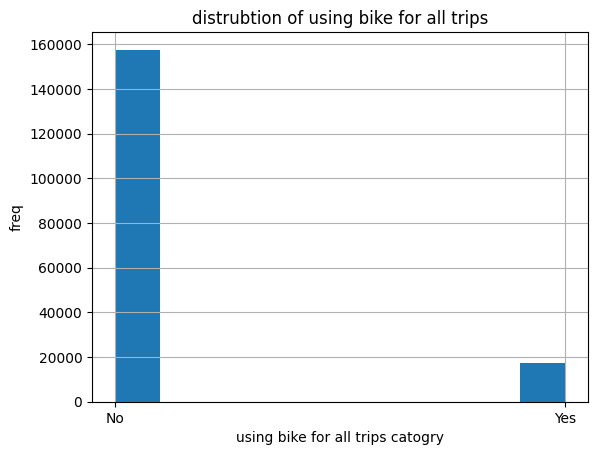

In [18]:
df['bike_share_for_all_trip'].hist()
plt.xlabel("using bike for all trips catogry")
plt.ylabel("freq")
plt.title("distrubtion of using bike for all trips");

In [19]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,total_time,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,0 days 14:29:45.830000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,0 days 17:10:54.928000,17.181667


In [20]:
df=df.query('member_birth_year>1920')

In [21]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,total_time,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0,0 days 14:29:45.830000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0,0 days 17:10:54.928000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0,0 days 10:08:10.832000,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0,0 days 00:26:25.525000,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0,0 days 00:29:53.128000,0.498056


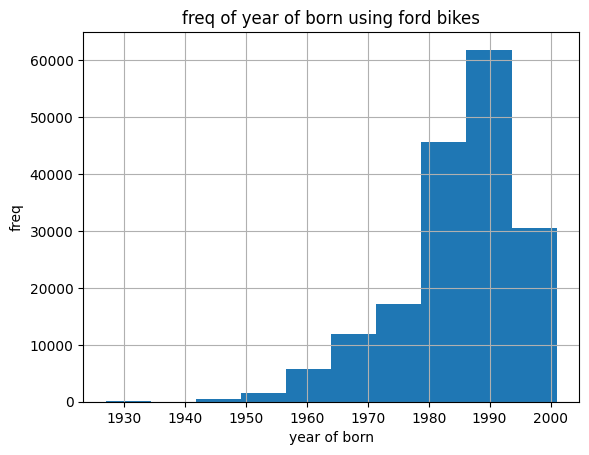

In [22]:
# after removing outliers
df['member_birth_year'].hist()
plt.xlabel("year of born")
plt.ylabel("freq")
plt.title("freq of year of born using ford bikes");

In [23]:
df['member_birth_year']=df['member_birth_year'].astype(int)

In [24]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,total_time,duration_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35.0,0 days 14:29:45.830000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47.0,0 days 17:10:54.928000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30.0,0 days 10:08:10.832000,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45.0,0 days 00:26:25.525000,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60.0,0 days 00:29:53.128000,0.498056


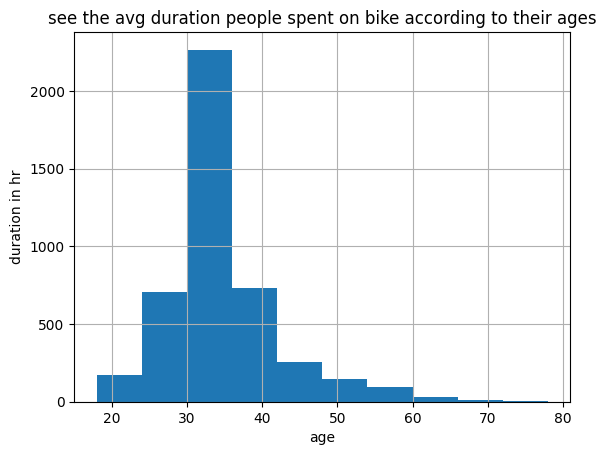

In [25]:
duration_vs_age=(
    df['age'].groupby(df['duration_hr']).mean()
)
duration_vs_age.hist()
plt.xlabel('age')
plt.ylabel('duration in hr')
plt.title("see the avg duration people spent on bike according to their ages");


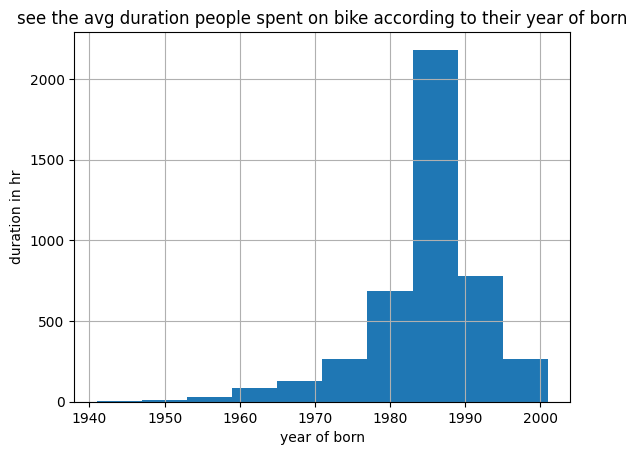

In [26]:
duration_vs_age=(
    df['member_birth_year'].groupby(df['duration_hr']).mean()
)
duration_vs_age.hist()
plt.xlabel('year of born')
plt.ylabel('duration in hr')
plt.title("see the avg duration people spent on bike according to their year of born");

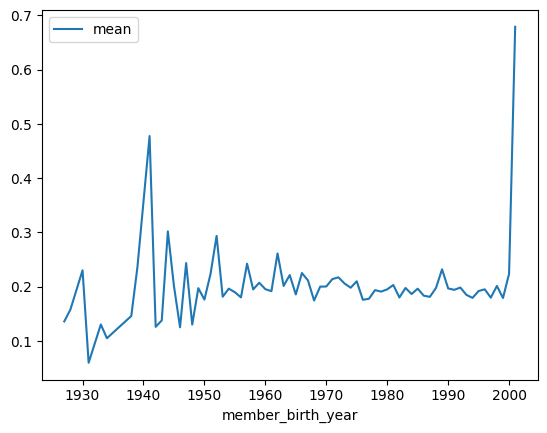

In [27]:
group_by_birth=df.groupby('member_birth_year')['duration_hr']
group_by_birth.agg(['mean','count']).plot(y="mean");

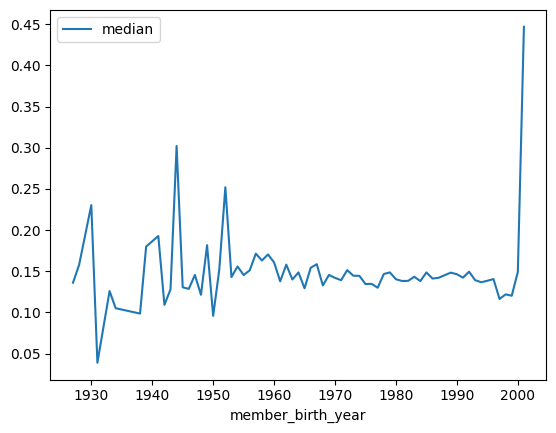

In [28]:
group_by_birth=df.groupby('member_birth_year')['duration_hr']
group_by_birth.agg(['mean','median']).plot(y="median");

In [29]:
df_agg=group_by_birth.agg(['mean','median','count'])
df_agg

,mean,median,count
member_birth_year,,,
1927,0.136111,0.136111,1
1928,0.157778,0.157778,1
1930,0.230278,0.230278,1
1931,0.059881,0.038889,89
1933,0.130514,0.125972,20
...,...,...,...
1997,0.179899,0.116389,3476
1998,0.201489,0.121944,3208
1999,0.179260,0.120278,2504
